In [1]:
import pandas as pd

In [2]:
# Group BY

In [2]:
import seaborn as sns

df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.groupby("sex")["fare"].count()

sex
female    314
male      577
Name: fare, dtype: int64

In [10]:
# find the mean age of the class in titanic

In [17]:
num = df.select_dtypes(exclude=["category", "object", "bool"])

In [26]:
num.groupby("survived")[["fare", "pclass"]].mean()

,fare,pclass
survived,,
0,22.117887,2.531876
1,48.395408,1.950292


In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
# what are the unique values in survived column and what does they signify

In [28]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [30]:
df["survived"].unique()

array([0, 1])

In [31]:
# What are the column names in your df

In [33]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [34]:
# Check for the average null values in your data

In [46]:
df.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [48]:
# Also find out the columns whose mean null values are greater than 10%.
flt = df.isnull().mean() * 100

In [52]:
flt[flt > 10.0].index.values

array(['age', 'deck'], dtype=object)

In [53]:
# What are the distribution of the passengers by class

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [57]:
# how many male and female paasengfers are there

In [58]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [60]:
# average age of the passenger who did'nt survived among each class

In [65]:
df[df["survived"] == 0].groupby("class")["age"].mean()

/tmp/ipykernel_25420/2929007222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df["survived"] == 0].groupby("class")["age"].mean()


class
First     43.695312
Second    33.544444
Third     26.555556
Name: age, dtype: float64

In [66]:
# Assumption -> Third class has least average age and first has maximum who did'nt survived.

In [71]:
df.loc[df["survived"] == 0, "sex"].value_counts()

sex
male      468
female     81
Name: count, dtype: int64

In [72]:
# this is showing that mortality rate is highest among males
# If the average age of people who did'nt survived is highes in first class
# There are aged people more in first class
# There are more  males in first class also

In [73]:
# finding the distibution of sex in each class

In [80]:
df.groupby("class")["sex"].value_counts()

/tmp/ipykernel_25420/1361624003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("class")["sex"].value_counts()


class   sex   
First   male      122
        female     94
Second  male      108
        female     76
Third   male      347
        female    144
Name: count, dtype: int64

In [81]:

# TODO: Third class has highest mortality rate
# TODO: Finding the distrbution of age in third class for male who did'nt survived.

In [82]:
surv = df[df["survived"] == 1]
not_surv = df[df["survived"] == 0]

In [90]:
not_surv["class"].value_counts() / len(not_surv) * 100

class
Third     67.759563
Second    17.668488
First     14.571949
Name: count, dtype: float64

In [111]:
# TODO: Finding the distrbution of age in third class for male who did'nt survived.

In [112]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

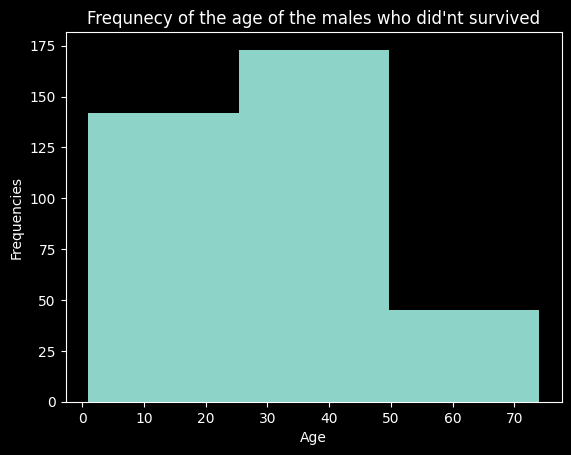

In [142]:
import matplotlib.pyplot as plt

not_surv.loc[not_surv["sex"] == "male", "age"].hist(bins=3)
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.title("Frequnecy of the age of the males who did'nt survived")
plt.style.use("dark_background")
plt.grid(False)
plt.show()

In [116]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [126]:
# Binning / Discretization / Intervals


def age_bin(x):
    if x >= 0 and x <= 24:
        return "First_Bin"
    elif x >= 25 and x <= 50:
        return "Second Bin"
    else:
        return "Third Bin"


not_surv["age_category"] = not_surv.loc[not_surv["sex"] == "male", "age"].apply(age_bin)

/tmp/ipykernel_25420/2046186281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_surv["age_category"] = not_surv.loc[not_surv["sex"] == "male", "age"].apply(age_bin)


<Axes: ylabel='age_category'>

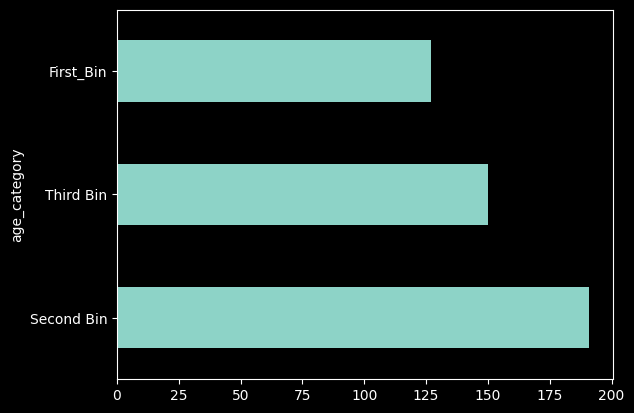

In [141]:
not_surv["age_category"].value_counts().plot(kind="barh")